In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv("Datasets\FRED-NROUST.csv")

In [7]:
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
327,01-10-2030,4.294982
328,01-01-2031,4.289282
329,01-04-2031,4.283630
330,01-07-2031,4.278029


# Partitioning the data

In [11]:
y = df["Value"]

y_train = df["Value"][:-8]
y_test = df["Value"][-8:]

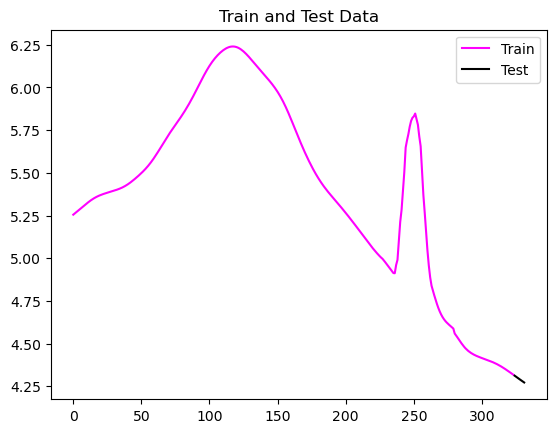

In [12]:
plt.plot(y_train,
         color = "magenta",
         label = "Train")

plt.plot(y_test,
         color = "black",
         label = "Test")

plt.legend(loc = "best")
plt.title("Train and Test Data")
plt.show()

# Centered Moving Average

In [13]:
fcast = y.rolling(3, center = True).mean()

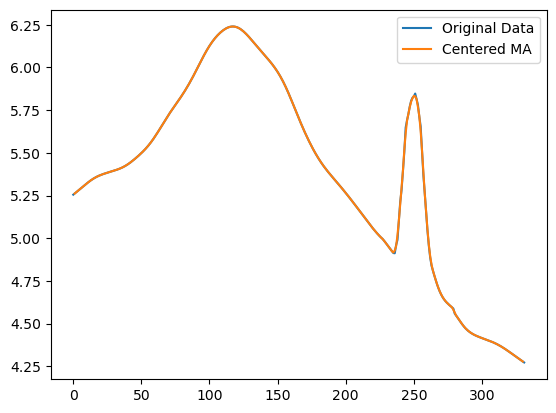

In [15]:
plt.plot(y, label = "Original Data")
plt.plot(fcast, label = "Centered MA")
plt.legend(loc = "best")

plt.show()

# Trailing moving average

For span 3

In [20]:
span = 3

In [21]:
fcast = y_train.rolling(span).mean()

In [22]:
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)

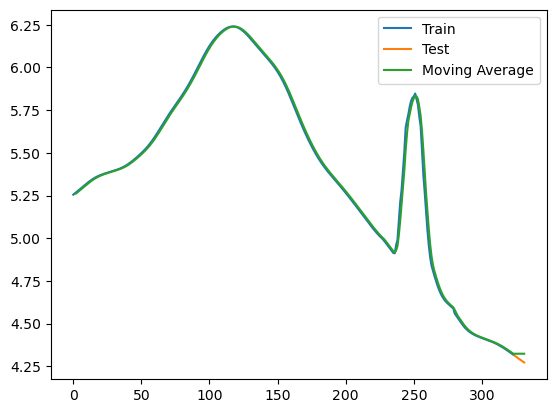

In [23]:
plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(MA_fcast, label = "Moving Average")
plt.legend(loc = "best")
plt.show()

In [25]:
# Evaluating

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE =", rmse)

RMSE = 0.03411541600561418


# Simple Exponential Smoothing